#### Первое практическое задание по курсу <<Вычислительная математика>>
*Работа выполнена Твердовым Константином, группа 592.*

Решается **Задача 1**:
>Написать программу, которая находит корень нелинейного уравнения $f(x^*) = 0$ методом обратной интерполяции на равномерной сетке.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#задаем функцию, интервал и число узлов сетки

#f = lambda x: x**3 - 27
#x0 = 2
#x1 = 5
#n = 5

#f = lambda x: 1/2 * np.tan(3 * x) - 1
#x0 = 0
#x1 = np.pi / 6 - 0.1
#n = 10

f = lambda x: np.sqrt(x)
x0 = 1
x1 = 2
n = 10

Нам задана функция $y = f(x)$. Тогда известна сеточная проекция функции:

| x | $x_0$ | $x_1$ | $\cdots$ | $x_n$ |
|---|-------|-------|----------|-------|
| y | $y_0$ | $y_1$ | $\cdots$ | $y_n$ |

рассмотрим тогда $x = g(y)$

| y | $y_0$ | $y_1$ | $\cdots$ | $y_n$ |
|---|-------|-------|----------|-------|
| x | $x_0$ | $x_1$ | $\cdots$ | $x_n$ |

Построим для $g(y)$ интерполяционный алгебраический полином в форме Лагранжа:  
$L_n(x) = \sum_{k=0}^n c_k(x) \cdot u_k$, где $c_k(x) = \prod_{\substack{i=0 \\ i\neq k}}^n \frac{x-x_i}{x_k-x_i}$.

Тогда можно найти $x^*$ как $x^* = P_n(0)$.

In [3]:
x = np.linspace(x0, x1, n)
fx = f(x)

In [4]:
#количество узлов в сетке для построения графиков
grid_accuracy = 70
grid = np.linspace(x0, x1, grid_accuracy)
#более подробная сетка для функции
grid_f = np.linspace(x0, x1, grid_accuracy*10) 

In [5]:
#считает c_k по приведенной выше формуле, принимая k и arg = x
def lagrange_coeffs(k, arg):
    c = 1.0
    
    for i in range(0, n):
        if (i != k):
            c *= (arg - fx[i]) / (fx[k] - fx[i])
            
    return c


#возвращает значение полинома Лагранжа в точке arg
def lagrange_construct(arg):
    l = 0
    for i in range(0, n):
        l += lagrange_coeffs(i, arg) * x[i]
    
    return l
            
lagrange_polynomial = np.zeros(grid_accuracy)

for i in range(0, grid_accuracy):
    lagrange_polynomial[i] = lagrange_construct(f(grid[i]))

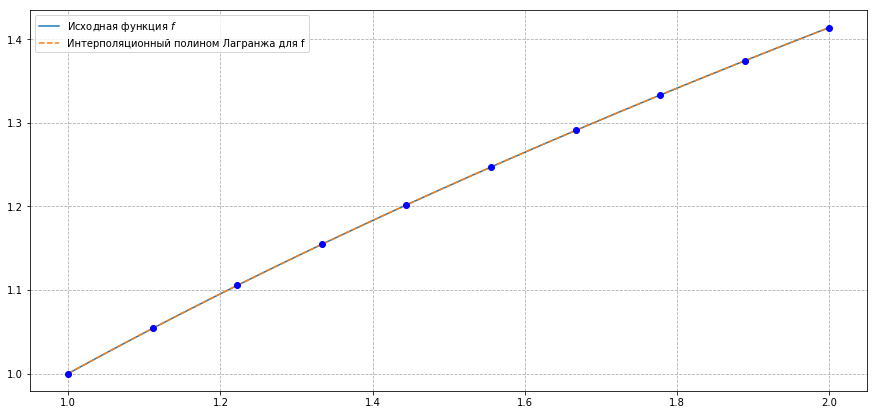

In [6]:
#строим график функции, полинома и точек интерполяции
plt.figure(figsize=(15, 7))
plt.plot(grid_f, f(grid_f), label = "Исходная функция $f$")
plt.plot(lagrange_polynomial, f(grid), linestyle='--', label = "Интерполяционный полином Лагранжа для f")
plt.plot(x, fx, color='b', linestyle='None', marker='o')
plt.legend()
plt.grid(linestyle='--')
plt.show()

In [7]:
#вычисляем ноль функции
null_x = lagrange_construct(0)
print('x* = ', null_x)

x* =  -5.58793544769e-07
